In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

data = pd.read_csv('covid-berlin-2021-11-10.csv', delimiter=';')
data.head()

,id,datum,fallzahl,neue_faelle,genesene,todesfaelle,7_tage_inzidenz,rel_veraenderung_der_7_tage_inzidenz,7_tage_hosp_inzidenz,its_belegung
0,1816,2021-11-11,NaN,NaN,NaN,NaN,263.4,NaN,NaN,NaN
1,1813,2021-11-10,237996.0,4530.0,215664.0,3753.0,247.0,44.6,3.7,12.9
2,1810,2021-11-09,233466.0,2209.0,214214.0,3740.0,233.4,41.4,3.7,12.8
3,1807,2021-11-08,231257.0,87.0,213524.0,3735.0,207.8,33.0,4.1,12.4
4,1804,2021-11-07,231170.0,134.0,213181.0,3735.0,207.4,34.5,4.2,NaN


In [6]:
data.datum = pd.to_datetime(data.datum)
data.head()

data.dtypes

id                                               int64
datum                                   datetime64[ns]
fallzahl                                       float64
neue_faelle                                    float64
genesene                                       float64
todesfaelle                                    float64
7_tage_inzidenz                                float64
rel_veraenderung_der_7_tage_inzidenz           float64
7_tage_hosp_inzidenz                           float64
its_belegung                                   float64
dtype: object

In [7]:
dataByWeek = data.groupby([pd.Grouper(key='datum', freq='W-MON')])['neue_faelle'].sum().reset_index().sort_values('datum')
dataByWeek.tail(10)

,datum,neue_faelle
78,2021-09-13,3361.0
79,2021-09-20,3070.0
80,2021-09-27,2684.0
81,2021-10-04,2899.0
82,2021-10-11,3118.0
83,2021-10-18,3367.0
84,2021-10-25,4479.0
85,2021-11-01,5425.0
86,2021-11-08,7721.0
87,2021-11-15,6739.0


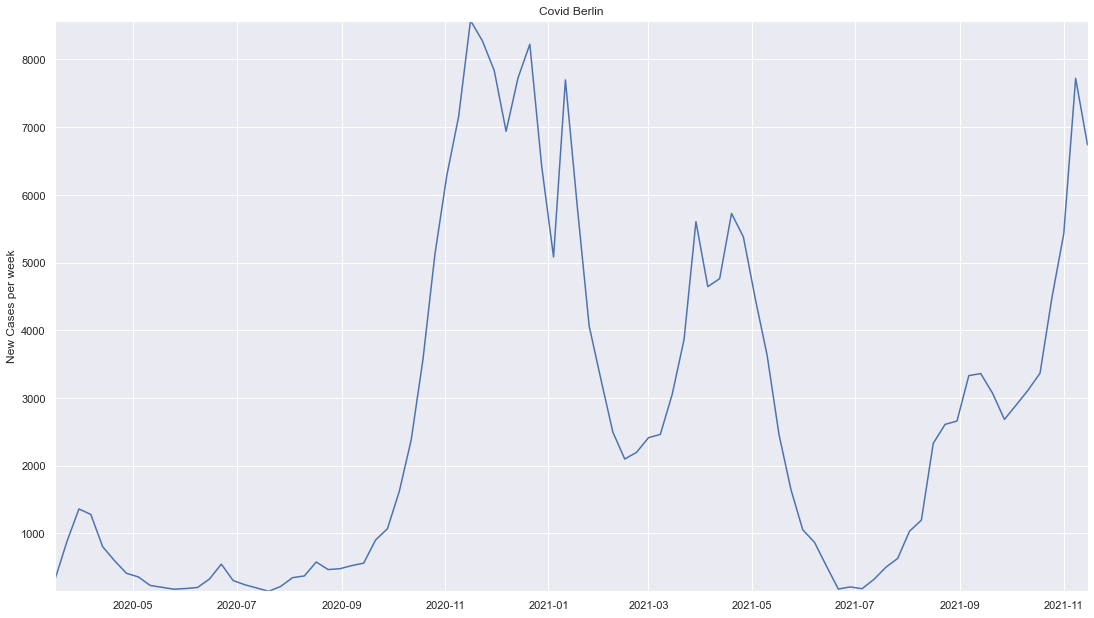

In [8]:


x = dataByWeek.datum
y1 = dataByWeek.neue_faelle
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
plot(x, y1, ax, 'Covid Berlin', 'New Cases per week')